# PhenoCam "roistats" Files

Here's a jupyter notebook demonstrating how to read in and plot an "roistats" file (formerly known as an "all image" file) using R.  In this case I'm using the all image file from the alligatorriver site.  The all image files are in CSV format and can be read directly from the [PhenoCam Network web site](https://phenocam.sr.unh.edu/webcam/) using a URL.  To use this notebook you'll need to install the packages, `ggplot2` and `lubridate` from CRAN.

In [4]:
library(ggplot2)
library(lubridate)

baseurl = 'https://phenocam.sr.unh.edu/data/archive'
sitename = 'alligatorriver'
roiname1 = 'DB_1000'

csvfile = sprintf("%s_%s_roistats.csv",sitename,roiname1)
csvurl = sprintf("%s/%s/ROI/%s",baseurl,sitename,csvfile)
df = read.csv(url(csvurl),comment.char="#",header=TRUE)
df$date = as.Date(df$date)
df$year = year(df$date)
ystart = min(df$year)
yend = max(df$year)
head(df)

date,local_std_time,doy,filename,solar_elev,exposure,mask_index,gcc,rcc,r_mean,⋯,b_10_qtl,b_25_qtl,b_50_qtl,b_75_qtl,b_90_qtl,b_95_qtl,r_g_correl,g_b_correl,b_r_correl,year
2012-05-03,12:01:10,124,alligatorriver_2012_05_03_120110.jpg,70.15241,NA,1,0.41935,0.38485,102.85102,⋯,2,24,48,74,103,123,0.98502,0.92033,0.93415,2012
2012-05-06,07:31:09,127,alligatorriver_2012_05_06_073109.jpg,27.97539,NA,1,0.42260,0.36243,91.86082,⋯,24,38,53,69,86,97,0.98148,0.89940,0.93900,2012
2012-05-06,08:01:09,127,alligatorriver_2012_05_06_080109.jpg,34.05378,NA,1,0.42547,0.38116,96.38509,⋯,16,31,47,65,83,95,0.98094,0.90209,0.93915,2012
2012-05-06,08:31:09,127,alligatorriver_2012_05_06_083109.jpg,40.10441,NA,1,0.42459,0.37440,92.04720,⋯,16,31,47,65,84,98,0.97965,0.89689,0.93617,2012
2012-05-06,09:01:09,127,alligatorriver_2012_05_06_090109.jpg,46.07717,NA,1,0.42391,0.38027,96.31717,⋯,15,30,47,66,86,99,0.98024,0.89955,0.93733,2012
2012-05-06,09:31:09,127,alligatorriver_2012_05_06_093109.jpg,51.90043,NA,1,0.41835,0.37313,97.34223,⋯,16,33,52,72,94,110,0.98050,0.91031,0.94106,2012


In [5]:
## combine date and local_std_time
df$datetime = with(df, as.POSIXct(paste(date,local_std_time), format="%Y-%m-%d %H:%M:%S"))

Warning message:
“Removed 1 rows containing missing values (geom_point).”

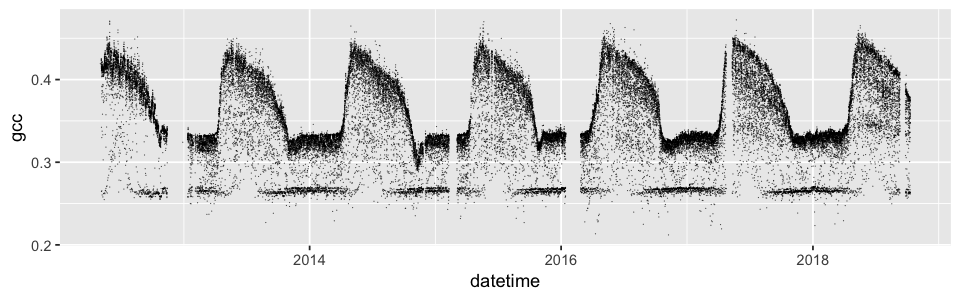

In [6]:
options(repr.plot.width = 8)
options(repr.plot.height = 2.5)
p = ggplot(df,aes(x=datetime,y=gcc)) + geom_point(size=0.01, shape=16, alpha=.7)
p